In [1]:
import numpy as np
import matplotlib.pyplot as plt
from exputils.RoM.dot import calculate_RoM_dot
from exputils.dot.dot_product import compute_all_dot_products
from exputils.state.random import make_random_quantum_state

In [2]:
n_qubit = 4
rho_vec = make_random_quantum_state("mixed", n_qubit, 0)
RoM, coeff, Amat = calculate_RoM_dot(n_qubit, rho_vec, method="gurobi")

Set parameter Username
Academic license - for non-commercial use only - expires 2024-04-22


In [3]:
RoM

1.37967595211064

In [4]:
p = (RoM - 1) / 2
rho_p = np.sum(coeff[coeff > 0] * Amat[:, coeff > 0].toarray(), axis=1)
rho_m = np.sum(coeff[coeff < 0] * Amat[:, coeff < 0].toarray(), axis=1)
assert np.allclose(rho_p + rho_m, rho_vec)
assert np.isclose(rho_p[0], 1 + p)
assert np.isclose(rho_m[0], -p)
rho_p /= 1 + p
rho_m /= -p
assert np.allclose((1 + p) * rho_p + (-p) * rho_m, rho_vec)
assert np.isclose(rho_p[0], 1)
assert np.isclose(rho_m[0], 1)

In [5]:
print(f"{p=}")
print(f"{np.dot(rho_vec, rho_p)=}")
print(f"{np.dot(rho_vec, rho_m)=}")

p=0.18983797605532005
np.dot(rho_vec, rho_p)=1.6309129124619484
np.dot(rho_vec, rho_m)=0.4755429377411309


In [6]:
dp = np.dot(rho_vec, rho_p)
dm = np.dot(rho_vec, rho_m)
print(f"{np.linalg.norm(rho_vec, ord=2) ** 2=}")
assert np.isclose(p, (np.linalg.norm(rho_vec, ord=2) ** 2 - dp) / (dp - dm))

np.linalg.norm(rho_vec, ord=2) ** 2=1.8502460100580354


min(dots)=0.3112466224471387, max(dots)=1.9775861349507158


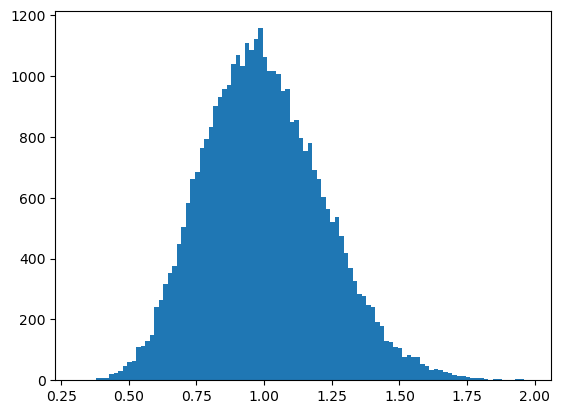

In [7]:
dots = compute_all_dot_products(n_qubit, rho_vec)
print(f"{min(dots)=}, {max(dots)=}")
plt.hist(dots, bins=100)
plt.show()

In [8]:
from exputils.st_norm import lb_by_st_norm
from exputils.state.canonical_magic_state import (
    make_canonical_magic_state_in_pauli_basis,
)


def lb_by_dot(n_qubit, rho_vec):
    dots = compute_all_dot_products(n_qubit, rho_vec)
    dp = np.max(dots)
    dm = np.min(dots)
    return 1 + 2 * (np.linalg.norm(rho_vec, ord=2) ** 2 - dp) / (dp - dm)

In [9]:
print(f"{lb_by_st_norm(n_qubit, rho_vec)=}")
print(f"{lb_by_dot(n_qubit, rho_vec)=}")

lb_by_st_norm(n_qubit, rho_vec)=0.8093178622185425
lb_by_dot(n_qubit, rho_vec)=0.847161849146385


In [10]:
n_qubit = 6
rho_vec = make_canonical_magic_state_in_pauli_basis(n_qubit).toarray().flatten()

print(f"{lb_by_st_norm(n_qubit, rho_vec)=}")
print(f"{lb_by_dot(n_qubit, rho_vec)=}")

lb_by_st_norm(n_qubit, rho_vec)=3.1269039581923277
lb_by_dot(n_qubit, rho_vec)=4.171849096546902


```python
lb_by_st_norm(n_qubit, rho_vec)=3.1269039581923277
lb_by_dot(n_qubit, rho_vec)=4.171849096546902
true_RoM=4.73894
```

We get the better lower bound by using the dot product.
